## ECE 239 Final Project

In this project we explore various deep learning algorithms on the EEG dataset. 


In [5]:
# Imports and setup

import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import LSTM
from keras.layers import GRU

from utils.load_data import *
from utils.utilities import *
from models.cnn import CNN
from models.rnn import RNN

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# Loads data from the EEG dataset and removes all EOG data

person_train_val, X_train_val, y_train_val, person_test, X_test, y_test = load_EEG_data()

print ('Training/Valid data shape: {}'.format(X_train_val.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_val.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_val.shape))
print ('Person test shape: {}'.format(person_test.shape))

Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


### Split into train and validation datasets

In [7]:
X_train, y_train, X_val, y_val = split_train_val(X_train_val, y_train_val, percent_validation=0.1)

print ('Training data shape: {}'.format(X_train.shape))
print ('Training target shape: {}'.format(y_train.shape))
print ('Validation data shape: {}'.format(X_val.shape))
print ('Validation target shape: {}'.format(y_val.shape))

Training data shape: (1904, 22, 1000)
Training target shape: (1904,)
Validation data shape: (211, 22, 1000)
Validation target shape: (211,)


## One hot encoding for all labels

In [8]:
print (y_val[33])
print (y_val.shape)
print (y_test.shape)

y_train_labels = one_hot_encode(y_train)
y_val_labels = one_hot_encode(y_val)
y_test_labels = one_hot_encode(y_test)

print (y_val_labels[33])
print (y_val_labels.shape)
print (y_test_labels.shape)


770
(211,)
(443,)
[0. 1. 0. 0.]
(211, 4)
(443, 4)


## Classifying data using a CNN

In [9]:
cnn = CNN(X_train, y_train_labels, X_val, y_val_labels, X_test, y_test_labels)
cnn.train(stride=2, optimizer='adam', epochs=5)
test_loss, test_accuracy = cnn.evaluate()
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

Instructions for updating:
Colocations handled automatically by placer.
Train on 1904 samples, validate on 211 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
1904/1904 [==============================] - 1s 535us/sample - loss: 1.4047 - acc: 0.2705 - val_loss: 1.3757 - val_acc: 0.2891
Epoch 2/5
1904/1904 [==============================] - 1s 270us/sample - loss: 1.3515 - acc: 0.3246 - val_loss: 1.3755 - val_acc: 0.3128
Epoch 3/5
1904/1904 [==============================] - 1s 298us/sample - loss: 1.2943 - acc: 0.3598 - val_loss: 1.4279 - val_acc: 0.2796
Epoch 4/5
1904/1904 [==============================] - 0s 235us/sample - loss: 1.2638 - acc: 0.3745 - val_loss: 1.4776 - val_acc: 0.2891
Epoch 5/5
443/443 [==============================] - 0s 95us/sample - loss: 1.4682 - acc: 0.3160
Test loss: 1.4682339650513625
Test accuracy: 0.31602708


## Classifying data using an LSTM Architecture

Train on 1904 samples, validate on 211 samples
Epoch 1/5
1904/1904 [==============================] - 6s 3ms/step - loss: 0.6438 - acc: 0.6574 - val_loss: 0.5901 - val_acc: 0.7216
Epoch 2/5
1904/1904 [==============================] - 4s 2ms/step - loss: 0.4884 - acc: 0.7748 - val_loss: 0.5816 - val_acc: 0.7299
Epoch 3/5
1904/1904 [==============================] - 4s 2ms/step - loss: 0.4117 - acc: 0.8276 - val_loss: 0.5732 - val_acc: 0.7382
Epoch 4/5
1904/1904 [==============================] - 4s 2ms/step - loss: 0.3538 - acc: 0.8667 - val_loss: 0.5794 - val_acc: 0.7251
Epoch 5/5
1904/1904 [==============================] - 4s 2ms/step - loss: 0.3048 - acc: 0.8989 - val_loss: 0.5835 - val_acc: 0.7310
Test loss: 0.5970056922118228
Test accuracy: 0.7229119652280959


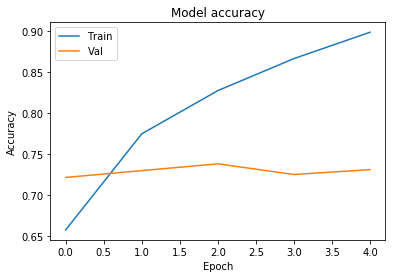

In [11]:
rnn = RNN(X_train, y_train_labels, X_val, y_val_labels, X_test, y_test_labels)
rnn.train(RNN_architecture=LSTM, activation="sigmoid", \
              optimizer='adam', epochs=5, batch_size=64, dropout=0.3)
test_loss, test_accuracy = rnn.evaluate()
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)


rnn.plot()

## Check Results

In [33]:
# TRAINING
print("TRAINING")
N = 400
sampleX = X_train[0:N,:,:]
sampleY = y_train_labels[0:N]
predictedY = rnn.predict(sampleX)
predictedLabels = np.argmax(predictedY, axis=1)
sampleLabels = np.argmax(sampleY, axis=1)

print("Predicted labels:")
print(predictedLabels)
print("Actual labels:")
print(sampleLabels)

num_equal = np.sum(1.0*np.equal(sampleLabels, predictedLabels))
print("Number of labels that are equal:")
print(num_equal)
print("Accuracy: ")
print(num_equal/N)

# VALIDATION
print("VALIDATION")
N = 400
sampleX = X_val[0:N,:,:]
sampleY = y_val_labels[0:N]
predictedY = rnn.predict(sampleX)
predictedLabels = np.argmax(predictedY, axis=1)
sampleLabels = np.argmax(sampleY, axis=1)

print("Predicted labels:")
print(predictedLabels)
print("Actual labels:")
print(sampleLabels)

num_equal = np.sum(1.0*np.equal(sampleLabels, predictedLabels))
print("Number of labels that are equal:")
print(num_equal)
print("Accuracy: ")
print(num_equal/N)



TRAINING
Predicted labels:
[0 0 3 1 3 0 0 3 3 0 2 0 2 0 2 3 1 2 0 0 1 2 2 3 1 1 1 3 1 0 1 1 1 1 1 2 0
 1 2 3 3 0 0 1 2 0 2 1 3 2 2 1 2 1 3 1 2 0 0 2 0 0 0 0 1 2 3 2 3 3 0 3 3 2
 1 1 2 3 0 0 2 2 2 1 1 1 2 0 2 0 2 3 0 0 2 1 0 2 0 0 2 0 1 2 1 0 2 3 2 1 3
 0 3 1 2 3 2 1 3 3 1 3 1 1 3 2 3 3 2 0 2 0 0 1 0 1 2 3 0 2 1 2 0 0 1 2 3 3
 3 1 1 1 3 0 2 3 1 2 2 1 3 1 3 3 0 0 1 1 3 1 3 3 3 0 0 0 3 2 2 3 2 2 0 1 0
 0 1 3 3 2 1 1 1 2 2 3 3 0 0 1 3 2 3 2 1 0 2 1 0 2 2 2 3 3 3 2 3 2 3 3 2 3
 2 0 1 3 0 3 0 0 1 3 0 2 0 2 0 3 1 3 2 1 1 2 1 2 2 0 1 0 1 3 3 2 3 3 0 2 3
 1 2 3 3 1 1 3 2 0 2 1 2 1 1 0 0 2 1 1 1 1 1 2 3 3 3 0 0 1 3 1 2 1 1 1 2 0
 1 2 0 2 2 0 2 2 0 3 2 0 1 3 2 2 0 2 1 2 1 1 3 0 2 3 2 2 0 3 2 3 3 2 2 0 3
 0 1 1 2 3 0 1 3 1 0 3 3 2 3 2 0 2 2 3 3 0 0 3 3 2 2 1 1 1 2 1 1 1 0 1 2 0
 2 3 3 0 0 1 3 0 0 1 1 0 2 2 0 1 1 2 2 0 3 1 0 2 1 3 3 3 2 2]
Actual labels:
[0 0 3 1 3 0 0 0 3 0 3 1 2 0 2 3 1 2 0 0 1 2 2 3 3 1 1 3 1 0 1 1 1 1 1 2 0
 1 2 3 3 0 0 1 2 0 2 1 3 2 2 1 2 1 3 1 2 0 0 2 0 0 0 0 1 2 3 2 3 3 0 3 

## Classifying Data using a GRU Architecture

In [12]:
rnn = RNN(X_train, y_train_labels, X_val, y_val_labels, X_test, y_test_labels)
rnn.train(RNN_architecture=GRU, activation="sigmoid", \
              optimizer='adam', epochs=5, batch_size=64, dropout=0.1)
test_loss, test_accuracy = rnn.evaluate()
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

Train on 1904 samples, validate on 211 samples
Epoch 1/5
1904/1904 [==============================] - 4s 2ms/step - loss: 0.6831 - acc: 0.6703 - val_loss: 0.6373 - val_acc: 0.6884
Epoch 2/5
1904/1904 [==============================] - 3s 2ms/step - loss: 0.4396 - acc: 0.8015 - val_loss: 0.6208 - val_acc: 0.7180
Epoch 3/5
1904/1904 [==============================] - 4s 2ms/step - loss: 0.3193 - acc: 0.8858 - val_loss: 0.6324 - val_acc: 0.7085
Epoch 4/5
1904/1904 [==============================] - 3s 2ms/step - loss: 0.2436 - acc: 0.9362 - val_loss: 0.6526 - val_acc: 0.7002
Epoch 5/5
1904/1904 [==============================] - 3s 2ms/step - loss: 0.1850 - acc: 0.9673 - val_loss: 0.6574 - val_acc: 0.7073
Test loss: 0.6517621107887199
Test accuracy: 0.6873589149985303


In [13]:
person1_X_train, person1_y_train = extract_person_data(X_train_val, y_train_val, person_train_val, person=1)
person2_X_test, person2_y_test = extract_person_data(X_train_val, y_train_val, person_train_val, person=2)

NameError: name 'person_train_valid' is not defined

In [66]:
rnn = RNN(person1_X_train, one_hot_encode(person1_y_train), None, None, person2_X_test, one_hot_encode(person2_y_test))
rnn.train(RNN_architecture=LSTM, activation="sigmoid", \
              optimizer='adam', epochs=5, batch_size=10, dropout=0.3)
test_loss, test_accuracy = rnn.evaluate()
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

Epoch 1/5
236/236 [==============================] - 3s 12ms/step - loss: 0.6893 - acc: 0.5964
Epoch 2/5
236/236 [==============================] - 1s 5ms/step - loss: 0.4191 - acc: 0.8464
Epoch 3/5
236/236 [==============================] - 1s 5ms/step - loss: 0.3147 - acc: 0.9195
Epoch 4/5
236/236 [==============================] - 1s 5ms/step - loss: 0.2535 - acc: 0.9523
Epoch 5/5
236/236 [==============================] - 1s 5ms/step - loss: 0.2022 - acc: 0.9714
Test loss: 0.6339652669631829
Test accuracy: 0.6779661016949152
